<a href="https://colab.research.google.com/github/abhimishhra29/Breast-cancer-Multi-Omics-data-classification/blob/main/Deepali_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.layers import Dense, Input, Dropout, Layer
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import f_classif

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

!cp /content/drive/'MyDrive'/tcga_multiomics_450k_27k_dataset.zip
!unzip -q -o multi_omics_dataset.zip
!rm dataset.zip

cp: missing destination file operand after '/content/drive/MyDrive/tcga_multiomics_450k_27k_dataset.zip'
Try 'cp --help' for more information.
unzip:  cannot find or open multi_omics_dataset.zip, multi_omics_dataset.zip.zip or multi_omics_dataset.zip.ZIP.
rm: cannot remove 'dataset.zip': No such file or directory


In [ ]:
gene_file = '/content/drive/MyDrive/research_abhi/mobrca_gene.csv'
meth_file = '/content/drive/MyDrive/research_abhi/mobrca_methylation.csv'
mirna_file = '/content/drive/MyDrive/research_abhi/mobrca_mirna.csv'
label_file = '/content/drive/MyDrive/research_abhi/sample_final.csv'

# Load data from files
gene_data = pd.read_csv(gene_file)
meth_data = pd.read_csv(meth_file)
mirna_data = pd.read_csv(mirna_file)
labels = pd.read_csv(label_file).values

In [ ]:
gene_data

,SampleID,A1BG,A1CF,A2ML1,A2M,A4GALT,A4GNT,AAAS,AACS,AADACL2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,TCGA.5L.AAT0,0.238939,0.001061,0.000371,0.018960,0.011926,0.280636,0.270618,0.044493,0.000000,...,0.086681,0.120444,0.394423,0.238138,0.462764,0.262796,0.359877,0.117489,0.252414,0.112190
1,TCGA.5L.AAT1,0.261935,0.025337,0.000431,0.025944,0.029861,0.027911,0.425185,0.031951,0.000000,...,0.312304,0.127535,0.193300,0.097459,0.593558,0.211848,0.137709,0.187950,0.166431,0.020908
2,TCGA.A1.A0SP,0.286831,0.019745,0.000189,0.031073,0.117327,0.000000,0.309938,0.067809,0.000000,...,0.056770,0.344252,0.106904,0.125597,0.118657,0.335987,0.123705,0.184779,0.111110,0.035726
3,TCGA.A2.A04V,0.128845,0.005188,0.000157,0.039170,0.104272,0.000000,0.338394,0.032933,0.000821,...,0.080723,0.085521,0.145211,0.094292,0.173485,0.180914,0.144088,0.194520,0.082637,0.058995
4,TCGA.A2.A04Y,0.174662,0.002722,0.000347,0.034782,0.069313,0.022487,0.384861,0.033347,0.000861,...,0.086146,0.091423,0.128505,0.094468,0.172188,0.020087,0.215469,0.139544,0.090762,0.080265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,TCGA.OL.A5D7,0.188797,0.010802,0.000399,0.019555,0.076678,0.022310,0.686005,0.022851,0.000000,...,0.013099,0.020286,0.076811,0.053213,0.195437,0.104317,0.035233,0.396938,0.090462,0.030101
1055,TCGA.OL.A5D8,0.137910,0.004747,0.000159,0.072084,0.099314,0.039218,0.329122,0.049319,0.000376,...,0.098730,0.055454,0.201854,0.146041,0.256872,0.025034,0.165657,0.172039,0.253583,0.054858
1056,TCGA.OL.A5DA,0.160186,0.035985,0.003422,0.061866,0.126303,0.142706,0.433572,0.034237,0.000456,...,0.120093,0.090486,0.130436,0.065169,0.396207,0.167752,0.189238,0.188675,0.181989,0.081382
1057,TCGA.OL.A5RV,0.078471,0.000000,0.000196,0.134120,0.090930,0.000000,0.480167,0.040047,0.000000,...,0.021016,0.028821,0.089581,0.044728,0.135680,0.051252,0.095702,0.219201,0.072221,0.070601


In [ ]:
meth_data

,SampleID,cg00000292,cg00002426,cg00003994,cg00005847,cg00007981,cg00008493,cg00008713,cg00011459,cg00012199,...,cg27650434,cg27651218,cg27652350,cg27653134,cg27654142,cg27655905,cg27661264,cg27662379,cg27662877,cg27665659
0,TCGA.5L.AAT0,0.678483,0.307301,0.100005,0.875122,0.028658,0.954225,0.084925,0.940438,0.047306,...,0.409546,0.965003,0.866693,0.913666,0.044624,0.064221,0.142693,0.082620,0.047022,0.089541
1,TCGA.5L.AAT1,0.261045,0.872125,0.044714,0.680860,0.027581,0.933860,0.067947,0.943097,0.050618,...,0.054430,0.874776,0.696772,0.933253,0.059916,0.054218,0.415154,0.058791,0.061012,0.040246
2,TCGA.A1.A0SP,0.850628,0.447297,0.496529,0.774736,0.032019,0.941596,0.059594,0.951900,0.046011,...,0.135687,0.959235,0.715644,0.856873,0.137645,0.055122,0.160599,0.083982,0.042533,0.065976
3,TCGA.A2.A04V,0.733004,0.394257,0.272595,0.626697,0.024139,0.936462,0.077891,0.954865,0.041562,...,0.241321,0.971607,0.640974,0.850226,0.082565,0.052890,0.417388,0.082907,0.043911,0.082583
4,TCGA.A2.A04Y,0.796488,0.352606,0.116450,0.638573,0.030863,0.945290,0.069835,0.923485,0.041371,...,0.090016,0.959459,0.761174,0.817014,0.071443,0.058429,0.172022,0.066537,0.039496,0.071553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,TCGA.OL.A5D7,0.636552,0.271619,0.090186,0.736100,0.026199,0.932573,0.064487,0.941177,0.046463,...,0.092608,0.966585,0.795076,0.617472,0.061323,0.047510,0.439264,0.051812,0.043486,0.079048
1055,TCGA.OL.A5D8,0.747720,0.536279,0.168586,0.585903,0.025572,0.939141,0.049171,0.910961,0.039959,...,0.067369,0.951484,0.597622,0.769415,0.126424,0.036350,0.353880,0.040145,0.028983,0.046878
1056,TCGA.OL.A5DA,0.560793,0.479490,0.079366,0.812665,0.026861,0.905925,0.056723,0.741672,0.042601,...,0.069915,0.944834,0.642122,0.522172,0.110745,0.041256,0.386488,0.053745,0.036465,0.051975
1057,TCGA.OL.A5RV,0.852534,0.509425,0.127861,0.332882,0.030123,0.950901,0.072331,0.957643,0.037433,...,0.109750,0.970788,0.656938,0.751568,0.086812,0.072977,0.188245,0.083104,0.036491,0.049828


In [ ]:
mirna_data

,SampleID,hsa-mir-1-1,hsa-mir-1-2,hsa-mir-100,hsa-mir-101-1,hsa-mir-101-2,hsa-mir-103a-1,hsa-mir-103a-2,hsa-mir-103b-1,hsa-mir-105-1,...,hsa-mir-940,hsa-mir-941-1,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
0,TCGA.5L.AAT0,0.000793,0.000498,0.083883,0.354060,0.355709,0.133184,0.132695,0,0.003863,...,0.055015,0.0,0.029344,0.104185,0.020363,0.104090,0.310961,0.119482,0.006960,0.173671
1,TCGA.5L.AAT1,0.000185,0.000295,0.065275,0.061429,0.060187,0.166436,0.165944,0,0.015386,...,0.012839,0.0,0.067638,0.000000,0.010672,0.044240,0.237736,0.319348,0.024623,0.063841
2,TCGA.A1.A0SP,0.000339,0.000325,0.047847,0.127141,0.127252,0.375206,0.373242,0,0.000000,...,0.015703,0.0,0.026472,0.000000,0.011421,0.050243,0.342661,0.386881,0.016884,0.167811
3,TCGA.A2.A04V,0.000704,0.000259,0.185069,0.202443,0.203969,0.215202,0.214131,0,0.000000,...,0.009395,0.0,0.024943,0.000000,0.049193,0.055492,0.256519,0.130513,0.099880,0.116908
4,TCGA.A2.A04Y,0.000356,0.000409,0.173519,0.248201,0.245206,0.228772,0.226514,0,0.000092,...,0.002469,0.0,0.017168,0.000000,0.021547,0.036458,0.086696,0.132492,0.126988,0.158772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,TCGA.OL.A5D7,0.000754,0.000682,0.116742,0.128870,0.130774,0.146980,0.147617,0,0.003592,...,0.007267,0.0,0.008269,0.000000,0.005436,0.038631,0.251651,0.162738,0.095833,0.065661
1055,TCGA.OL.A5D8,0.000587,0.000406,0.244356,0.198826,0.202644,0.196925,0.194688,0,0.000085,...,0.005656,0.0,0.036471,0.000000,0.039489,0.073501,0.053078,0.164501,0.169737,0.055777
1056,TCGA.OL.A5DA,0.000071,0.000271,0.247605,0.074390,0.075527,0.169115,0.168125,0,0.000000,...,0.022066,0.0,0.015499,0.000000,0.009170,0.036205,0.158084,0.177388,0.136981,0.086231
1057,TCGA.OL.A5RV,0.000291,0.000358,0.206786,0.261583,0.264152,0.161520,0.160094,0,0.000054,...,0.010087,0.0,0.013665,0.000000,0.026949,0.046816,0.168821,0.146280,0.094225,0.074610


In [ ]:
labels

array([['TCGA.5L.AAT0', 'LumA'],
       ['TCGA.5L.AAT1', 'Her2'],
       ['TCGA.A1.A0SP', 'LumB'],
       ...,
       ['TCGA.OL.A5DA', 'LumA'],
       ['TCGA.OL.A5RV', 'LumA'],
       ['TCGA.OL.A5RW', 'LumB']], dtype=object)

In [ ]:
# Read the labels from the CSV file
labels_df = pd.read_csv(label_file)

# Assuming the second column contains the labels
labels = labels_df.iloc[:, 1].values.reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the labels
one_hot_labels = encoder.fit_transform(labels)
one_hot_labels

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:
one_hot_labels

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [ ]:

# Split only gene_data and labels
gene_train, gene_test, labels_train, labels_test = train_test_split(
    gene_data, one_hot_labels, test_size=0.2, random_state=42)

In [ ]:
gene_train.shape

(847, 17439)

In [ ]:
labels_train.shape

(847, 5)

In [ ]:
y = np.argmax(labels_train, axis=1)
# Step 3: Apply ANOVA F-Test
F_values, p_values = f_classif(gene_train, y)

# Step 4: Select features based on p-value threshold
significant_features = p_values < 0.0000000000000000000000000000000005  # Adjust threshold as necessary
X_selected = gene_train[:, significant_features]
X_selected_test = gene_test[:, significant_features]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [3768] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
X_selected.shape

(847, 1702)

In [ ]:
# External Attention Layer
class ExternalAttention(Layer):
    def __init__(self, external_memory_size, **kwargs):
        super(ExternalAttention, self).__init__(**kwargs)
        self.external_memory_size = external_memory_size

    def build(self, input_shape):
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], self.external_memory_size), initializer='random_normal', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(self.external_memory_size,), initializer='zeros', trainable=True)
        self.U = self.add_weight(name='external_weight', shape=(self.external_memory_size, input_shape[-1]), initializer='random_normal', trainable=True)
        super(ExternalAttention, self).build(input_shape)

    def call(self, inputs):
        x = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=(1, 0)) + self.b)
        attn_weights = tf.nn.softmax(x, axis=1)
        external_context = tf.tensordot(attn_weights, self.U, axes=(1, 0))
        output = inputs + external_context
        return output

In [ ]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_selected, labels_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_selected_test, labels_test))

# Define batch size
batch_size = 32

# Shuffle, batch, and prefetch the datasets
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [ ]:
# Optionally, print a batch to check
for gene_batch, label_batch in train_dataset.take(1):
    print(gene_batch.shape, label_batch.shape)


(32, 1702) (32, 5)


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

class F1Macro(tf.keras.metrics.Metric):
    def __init__(self, name='f1_macro', **kwargs):
        super(F1Macro, self).__init__(name=name, **kwargs)
        self.tp = self.add_weight(name='tp', initializer='zeros')
        self.fp = self.add_weight(name='fp', initializer='zeros')
        self.fn = self.add_weight(name='fn', initializer='zeros')
        self.num_classes = None

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true, axis=-1)
        y_pred = tf.argmax(y_pred, axis=-1)

        num_classes = tf.math.maximum(tf.reduce_max(y_true), tf.reduce_max(y_pred)) + 1
        if self.num_classes is None:
            self.num_classes = num_classes

        # Compute confusion matrix
        confusion_matrix = tf.math.confusion_matrix(y_true, y_pred, num_classes=self.num_classes, dtype=tf.float32)

        # Extract TP, FP, FN for each class
        tp = tf.linalg.diag_part(confusion_matrix)
        fp = tf.reduce_sum(confusion_matrix, axis=0) - tp
        fn = tf.reduce_sum(confusion_matrix, axis=1) - tp

        # Compute precision, recall, and F1 score for each class
        precision = tp / (tp + fp + K.epsilon())
        recall = tp / (tp + fn + K.epsilon())
        f1_score = 2 * (precision * recall) / (precision + recall + K.epsilon())

        # Average F1 score across all classes (macro average)
        f1_macro = tf.reduce_mean(f1_score)

        self.tp.assign(f1_macro)

    def result(self):
        return self.tp

    def reset_states(self):
        self.tp.assign(0)
        self.fp.assign(0)
        self.fn.assign(0)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Assuming labels_train contains your one-hot encoded labels
y_train = np.argmax(labels_train, axis=1)  # Convert one-hot encoded labels to class indices

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary format
class_weight_dict = dict(enumerate(class_weights))


In [ ]:
class_weight_dict

{0: 1.1682758620689655,
 1: 2.646875,
 2: 0.37067833698030633,
 3: 1.1293333333333333,
 4: 5.464516129032258}

In [ ]:
# Define input shape based on gene_train shape
input_shape = gene_train.shape[1]

# Define the model
input_layer = Input(shape=(input_shape,))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = ExternalAttention(external_memory_size=50)(x)
x = Dense(32, activation='relu')(x)

# Output layer based on labels_train shape
output_shape = labels_train.shape[1]
output_layer = Dense(output_shape, activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=["accuracy", tfa.metrics.F1Score(num_classes=output_shape, average='macro')]
)

# Print the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 17439)]           0         
                                                                 
 dense_4 (Dense)             (None, 128)               2232320   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 external_attention_1 (Exte  (None, 64)                6450      
 rnalAttention)                                                  
                                                           

In [ ]:
pip install tensorflow-addons


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
pip install tensorflow==2.15.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
history = model.fit(
    gene_train,  # Your training data
    labels_train,  # Your training labels
    epochs=100,  # Number of epochs to train
    batch_size=32,  # Batch size (adjust based on your dataset)
    validation_data=(gene_test, labels_test),  # Your validation data and labels
    class_weight=class_weight_dict  # Apply class weights
)


Epoch 1/100
27/27 [==============================] - 0s 14ms/step - loss: 1.3255 - accuracy: 0.2468 - f1_score: 0.2757 - val_loss: 1.2887 - val_accuracy: 0.2264 - val_f1_score: 0.2211
Epoch 2/100
27/27 [==============================] - 0s 10ms/step - loss: 1.2857 - accuracy: 0.2137 - f1_score: 0.2342 - val_loss: 1.2806 - val_accuracy: 0.2028 - val_f1_score: 0.2121
Epoch 3/100
27/27 [==============================] - 0s 9ms/step - loss: 1.3306 - accuracy: 0.2456 - f1_score: 0.2826 - val_loss: 1.2748 - val_accuracy: 0.3821 - val_f1_score: 0.2787
Epoch 4/100
27/27 [==============================] - 0s 10ms/step - loss: 1.3246 - accuracy: 0.2503 - f1_score: 0.2719 - val_loss: 1.2654 - val_accuracy: 0.2311 - val_f1_score: 0.2245
Epoch 5/100
27/27 [==============================] - 0s 11ms/step - loss: 1.3214 - accuracy: 0.1865 - f1_score: 0.2267 - val_loss: 1.3065 - val_accuracy: 0.1981 - val_f1_score: 0.2081
Epoch 6/100
27/27 [==============================] - 0s 9ms/step - loss: 1.3215 -

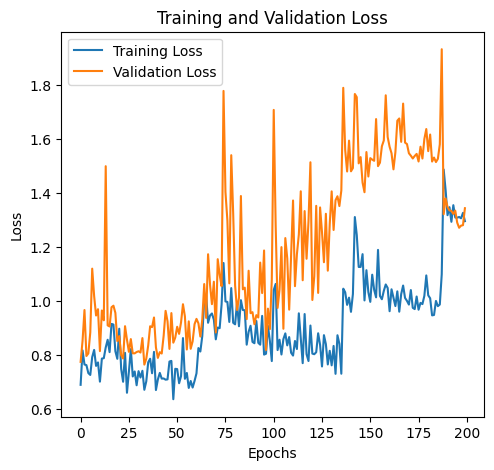

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


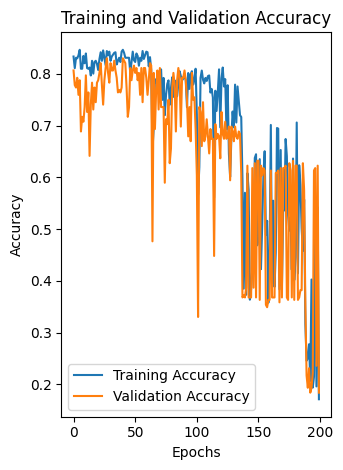

In [ ]:
# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Check if F1 Macro is available and plot it if it is
if 'f1_macro' in history.history:
    plt.plot(history.history['f1_macro'], label='Training F1 Macro')
    plt.plot(history.history['val_f1_macro'], label='Validation F1 Macro')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
# Define input shape based on gene_train shape
input_shape = gene_train.shape[1]

# Define the model
input_layer = Input(shape=(input_shape,))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = ExternalAttention(external_memory_size=50)(x)
x = Dense(32, activation='relu')(x)

# Output layer based on labels_train shape
output_shape = labels_train.shape[1]
output_layer = Dense(output_shape, activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)


In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow_addons as tfa

In [ ]:
# Compile the model with the specified learning rate and metrics
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=["accuracy", tfa.metrics.F1Score(num_classes=output_shape, average='macro')]
)


# Fit the model
history = model.fit(
    gene_train,  # Your training data
    labels_train,  # Your training labels
    epochs=50,  # Number of epochs to train
    batch_size=32,  # Batch size (adjust based on your dataset)
    validation_data=(gene_test, labels_test)  # Optional: validation data to monitor performance
)

Epoch 1/50
27/27 [==============================] - 2s 21ms/step - loss: 1.6052 - accuracy: 0.3849 - f1_score: 0.2321 - val_loss: 1.1272 - val_accuracy: 0.6085 - val_f1_score: 0.3200
Epoch 2/50
27/27 [==============================] - 0s 9ms/step - loss: 1.0516 - accuracy: 0.6151 - f1_score: 0.3187 - val_loss: 0.9274 - val_accuracy: 0.6415 - val_f1_score: 0.3218
Epoch 3/50
27/27 [==============================] - 0s 9ms/step - loss: 0.8834 - accuracy: 0.6765 - f1_score: 0.3678 - val_loss: 0.7688 - val_accuracy: 0.6415 - val_f1_score: 0.3435
Epoch 4/50
27/27 [==============================] - 0s 11ms/step - loss: 0.8324 - accuracy: 0.6895 - f1_score: 0.3561 - val_loss: 0.7640 - val_accuracy: 0.6415 - val_f1_score: 0.3383
Epoch 5/50
27/27 [==============================] - 0s 11ms/step - loss: 0.7734 - accuracy: 0.7025 - f1_score: 0.4009 - val_loss: 0.7469 - val_accuracy: 0.6557 - val_f1_score: 0.3627
Epoch 6/50
27/27 [==============================] - 0s 9ms/step - loss: 0.7014 - accura

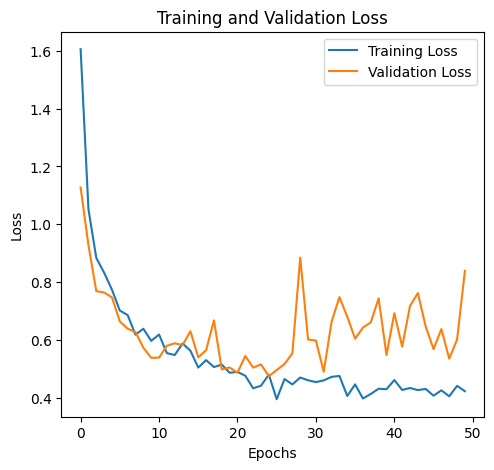

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [ ]:

# Define input shape based on gene_train shape
input_shape = X_selected.shape[1]

# Define the model
input_layer = Input(shape=(input_shape,))
x = Dense(128, activation='relu')(input_layer)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = ExternalAttention(external_memory_size=50)(x)
x = Dense(32, activation='relu')(x)

# Output layer based on labels_train shape
output_shape = labels_train.shape[1]
output_layer = Dense(output_shape, activation='softmax')(x)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with the specified learning rate and metrics
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=["accuracy", tfa.metrics.F1Score(num_classes=output_shape, average='macro')]
)


# Fit the model
history = model.fit(
    X_selected,  # Your training data
    labels_train,  # Your training labels
    epochs=50,  # Number of epochs to train
    batch_size=32,  # Batch size (adjust based on your dataset)
    validation_data=(X_selected_test, labels_test)  # Optional: validation data to monitor performance
)

Epoch 1/50
27/27 [==============================] - 3s 17ms/step - loss: 1.2612 - accuracy: 0.5431 - f1_score: 0.2047 - val_loss: 1.1413 - val_accuracy: 0.6038 - val_f1_score: 0.3182
Epoch 2/50
27/27 [==============================] - 0s 8ms/step - loss: 0.9871 - accuracy: 0.6446 - f1_score: 0.3282 - val_loss: 0.8875 - val_accuracy: 0.7170 - val_f1_score: 0.4303
Epoch 3/50
27/27 [==============================] - 0s 8ms/step - loss: 0.8403 - accuracy: 0.7273 - f1_score: 0.4197 - val_loss: 0.7358 - val_accuracy: 0.7358 - val_f1_score: 0.4485
Epoch 4/50
27/27 [==============================] - 0s 7ms/step - loss: 0.7223 - accuracy: 0.7462 - f1_score: 0.4354 - val_loss: 0.6718 - val_accuracy: 0.7594 - val_f1_score: 0.4810
Epoch 5/50
27/27 [==============================] - 0s 7ms/step - loss: 0.6734 - accuracy: 0.7521 - f1_score: 0.4495 - val_loss: 0.6171 - val_accuracy: 0.7594 - val_f1_score: 0.4786
Epoch 6/50
27/27 [==============================] - 0s 9ms/step - loss: 0.6094 - accuracy

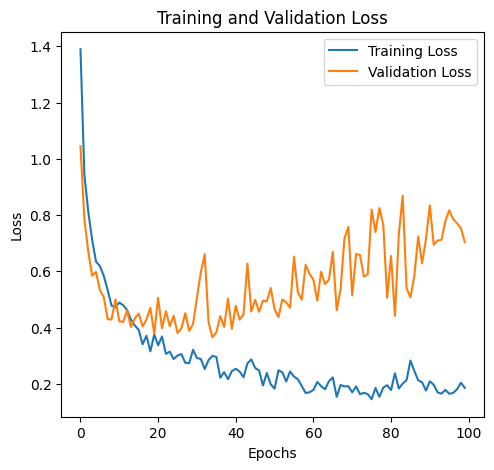

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


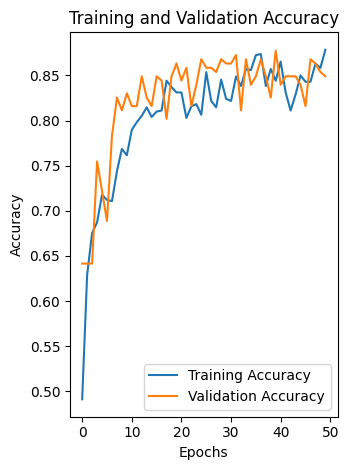

In [ ]:
# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Check if F1 Macro is available and plot it if it is
if 'f1_macro' in history.history:
    plt.plot(history.history['f1_macro'], label='Training F1 Macro')
    plt.plot(history.history['val_f1_macro'], label='Validation F1 Macro')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()
